Logistic Regression
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 





In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
train_file_path = 'Titanic_train.csv'
test_file_path = 'Titanic_test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Display the first few rows of the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.isnull() .sum()
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# Summary statistics
summary_stats = train_df.describe(include='all')

# Data types
data_types = train_df.dtypes

summary_stats, data_types

(        PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch  Ticke

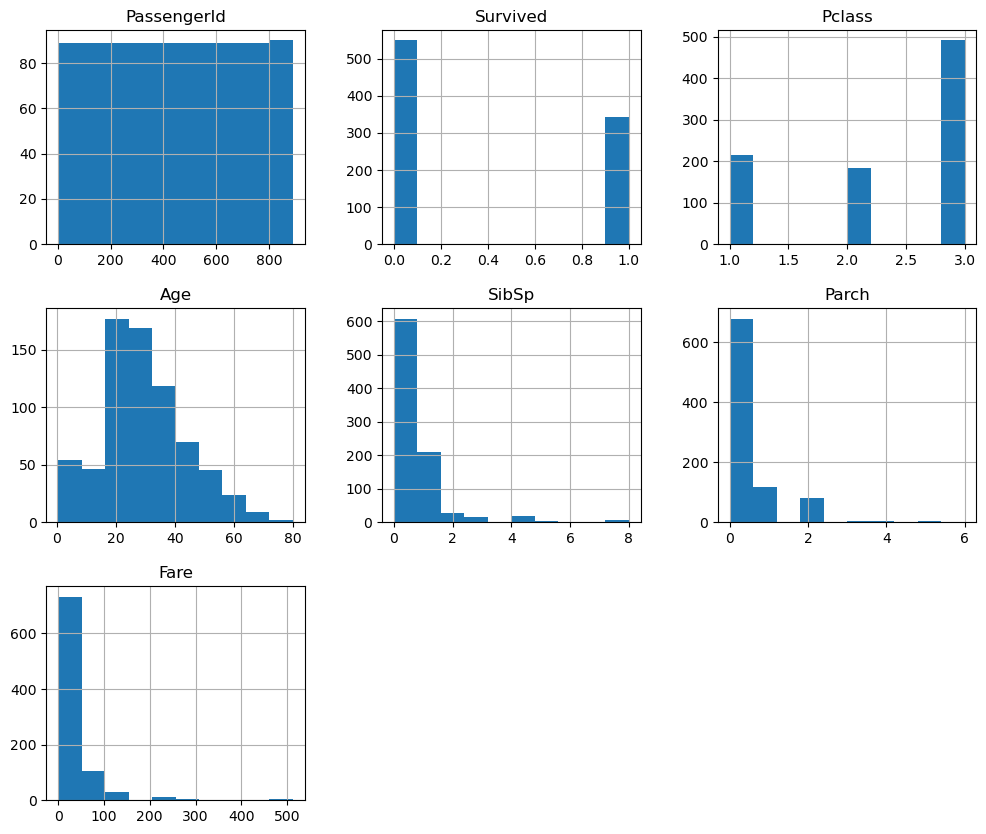

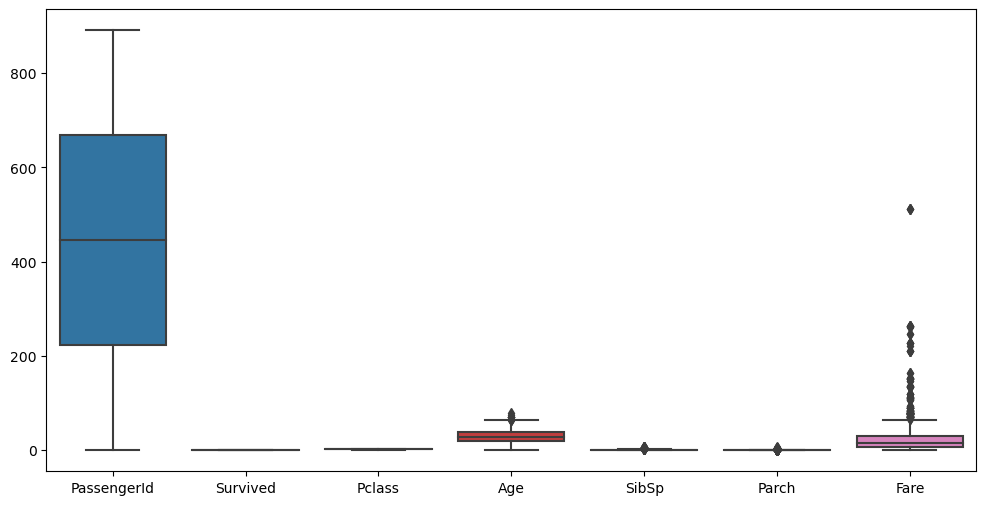

/Users/vaishanavipurohit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


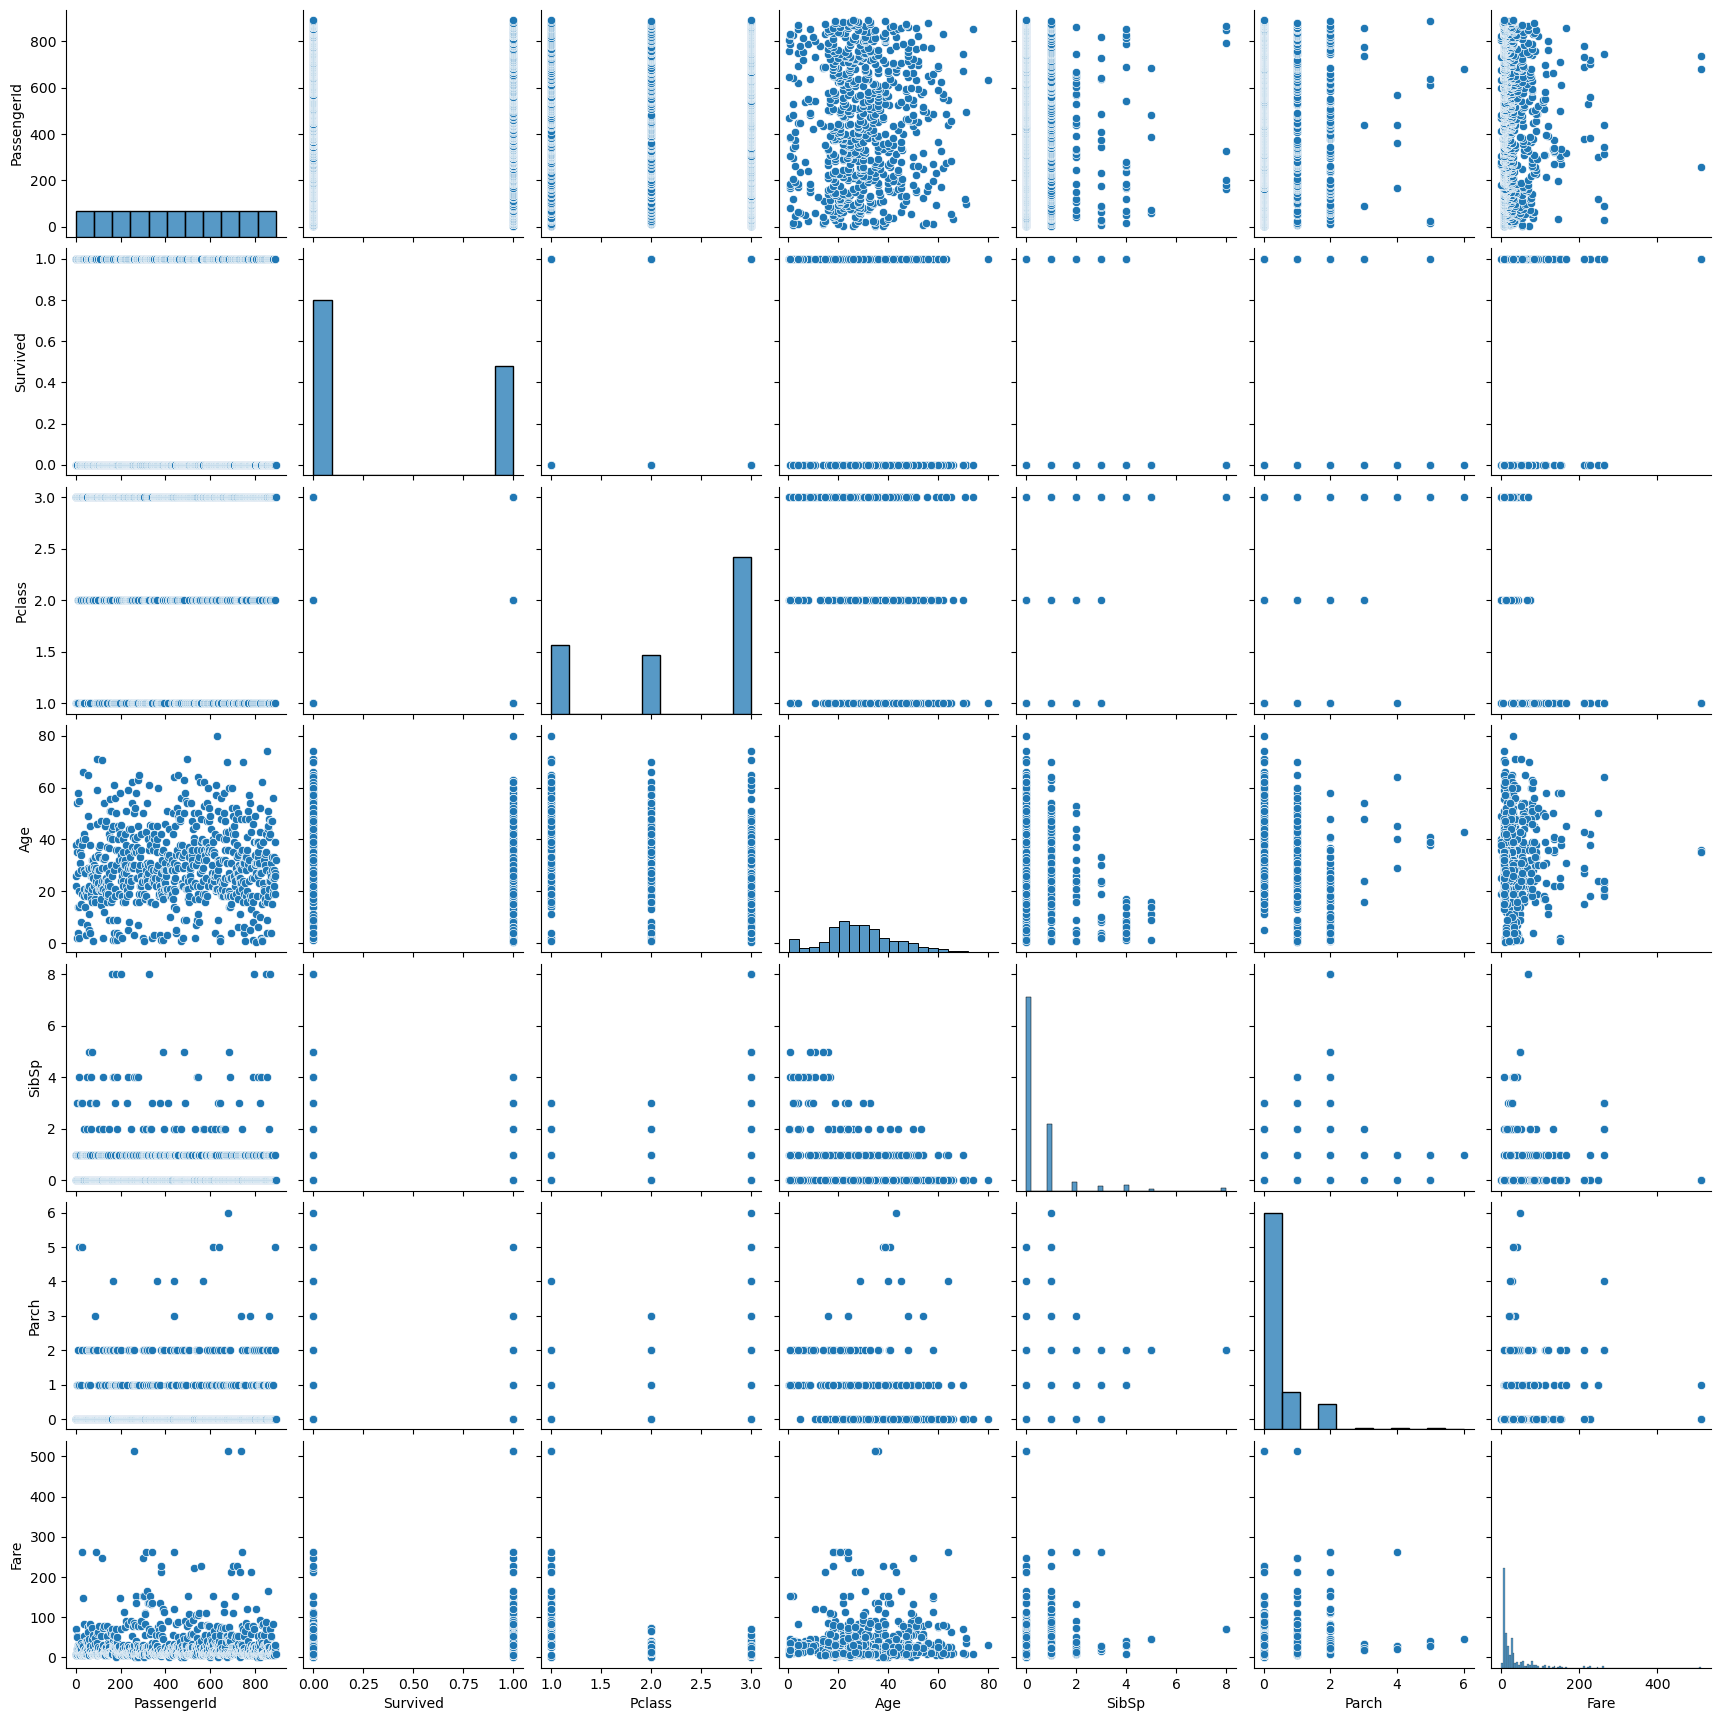

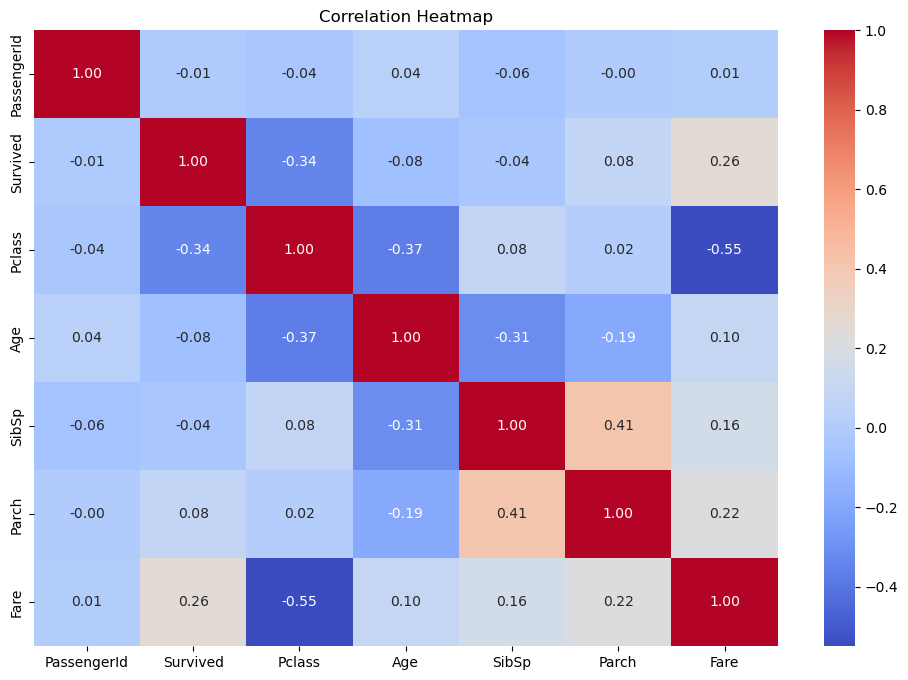

In [6]:
# Histograms for numerical features
train_df.hist(figsize=(12, 10))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.show()

# Pair plot
sns.pairplot(train_df.select_dtypes(include=['float64', 'int64']))
plt.show()

numerical_df = train_df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
mean = train_df["Age"].mean()
std = train_df["Age"].std()
is_null = train_df["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = train_df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_df["Age"] = age_slice

In [8]:
mean = test_df["Age"].mean()
std = test_df["Age"].std()
is_null = test_df["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = test_df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_df["Age"] = age_slice

In [9]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")
test_df["Embarked"] = test_df["Embarked"].fillna("S")

In [10]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
train_df.drop(col_to_drop, axis=1, inplace = True)
test_df.drop(col_to_drop, axis=1, inplace = True)

In [11]:
# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure both train and test have the same dummy variables
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns.drop('Survived')]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the features (X) and the target variable (y)
X = train_df.drop(columns='Survived')
y = train_df['Survived']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-Score: 0.75
ROC-AUC: 0.8803088803088802


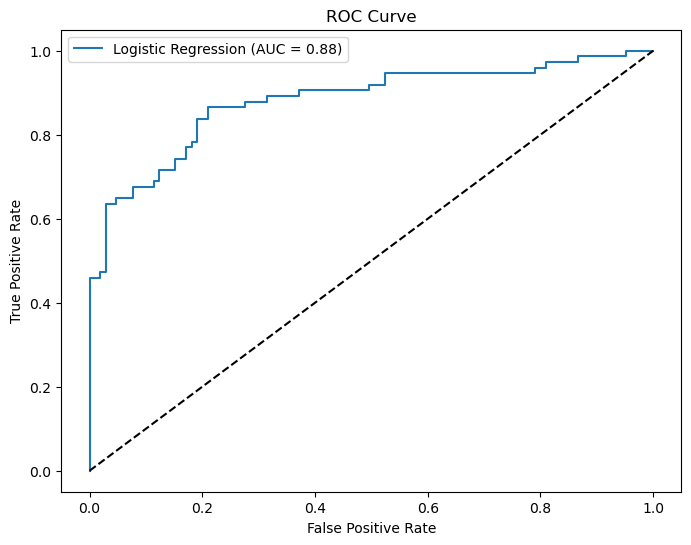

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [14]:
# Get the coefficients
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Pclass,-0.909933
Age,-0.027891
SibSp,-0.283498
Parch,-0.109412
Fare,0.002781
Sex_male,-2.593699
Embarked_Q,-0.153251
Embarked_S,-0.414648


Interview Questions
1. What is the difference between precision and recall?

Precision measures the accuracy of positive predictions, while recall measures the coverage of actual positives.

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to assess the generalization ability of a model. It involves splitting the dataset into multiple subsets (folds), training the model on some folds, and testing it on the remaining fold(s). It is important in binary classification because it provides a more reliable estimate of model performance, helps in optimizing hyperparameters, and ensures the model's stability across different subsets of data.